## Importing libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
survey = pd.read_csv("fact_survey_responses.csv")

In [4]:
survey

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Other,Caffeine,No,No,Print media,Compact and portable cans,Yes,100-150,Supermarkets,Studying/working late
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,More natural ingredients,Caffeine,No,No,TV commercials,Other,Yes,50-99,Online retailers,Social outings/parties
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,Other,Caffeine,Yes,No,Outdoor billboards,Compact and portable cans,No,100-150,Other,Sports/exercise
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Other,Sugar,Yes,Yes,Online ads,Compact and portable cans,Not Sure,50-99,Supermarkets,Studying/working late


In [5]:
people = pd.read_csv("dim_repondents.csv")

In [6]:
people

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120
...,...,...,...,...,...
9995,130026,Arnav Kale,31-45,Male,CT112
9996,130027,Yuvraj Agrawal,15-18,Male,CT113
9997,130028,Vardaniya Chauhan,31-45,Male,CT114
9998,130029,Jayan Goyal,19-30,Male,CT113


In [7]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [8]:
cities = pd.read_csv("dim_cities.csv")

In [9]:
cities

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


## Demographic Insights

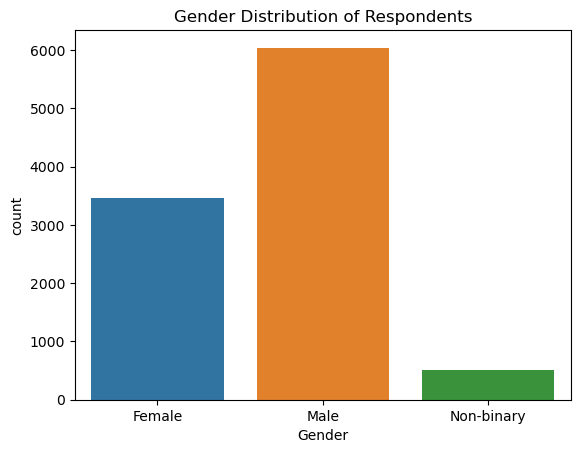

In [10]:
# 1a - Who prefers energy drink more? (male/female/non-binary?)

plt.figure()
sns.countplot(x='Gender', data= people)
plt.title('Gender Distribution of Respondents')
plt.show()


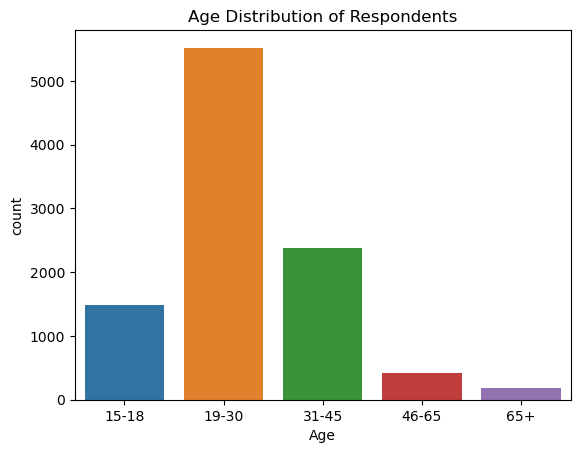

In [11]:
#1b -Which age group prefers energy drinks more?

plt.figure()
sns.countplot(x='Age', data= people)
plt.title('Age Distribution of Respondents')
plt.show()

In [12]:
#1c - Which type of marketing reaches the most Youth (15-30)?

# Subset Data for Youth (15-30)
youth_subset = people[people['Age'].isin(['15-18', '19-30'])]
youth_responses = pd.merge(youth_subset, survey, on='Respondent_ID', how='inner')

# Analyze Marketing Channels
marketing_channel_counts = youth_responses['Marketing_channels'].value_counts()

# Calculate Percentages
percentage_distribution = (marketing_channel_counts / marketing_channel_counts.sum()) * 100

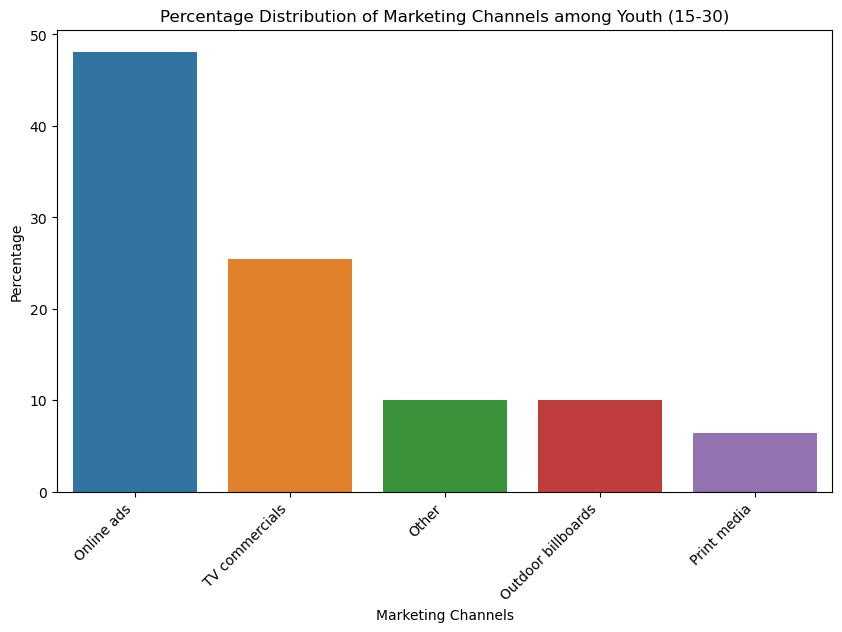

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values)
plt.title('Percentage Distribution of Marketing Channels among Youth (15-30)')
plt.xlabel('Marketing Channels')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

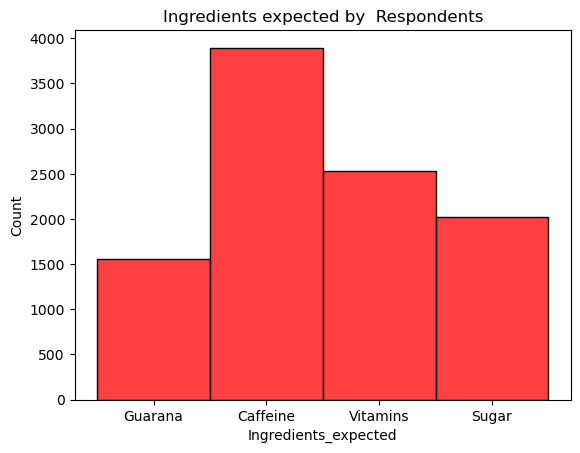

In [14]:
#2a - What are the preferred ingredients of energy drinks among respondents?

plt.figure()
sns.histplot(x='Ingredients_expected', data= survey,color="red")
plt.title('Ingredients expected by  Respondents')
plt.show()

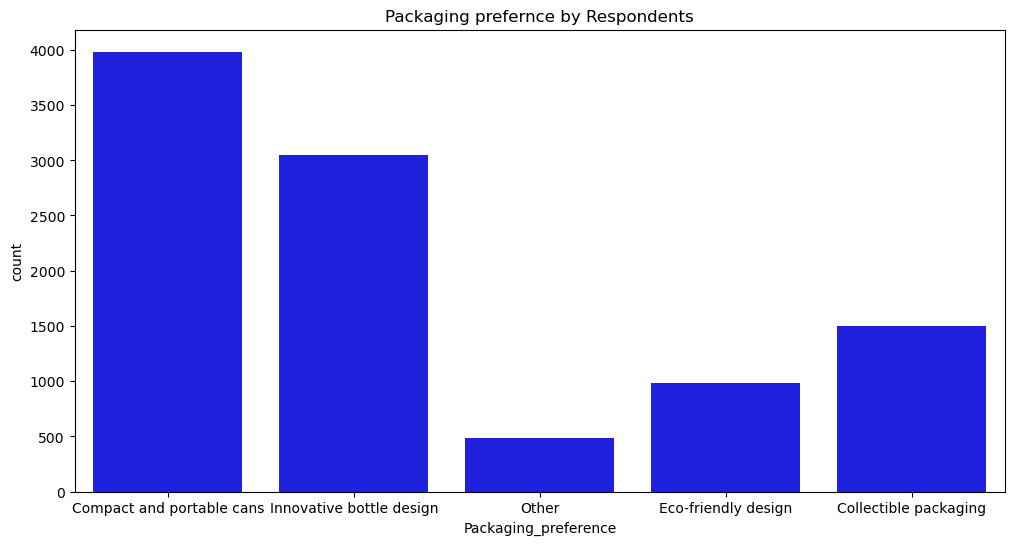

In [15]:
#2b -What packaging preferences do respondents have for energy drinks?

plt.figure(figsize=(12,6))
sns.countplot(x='Packaging_preference', data= survey,color="blue")
plt.title('Packaging prefernce by Respondents')
plt.show()


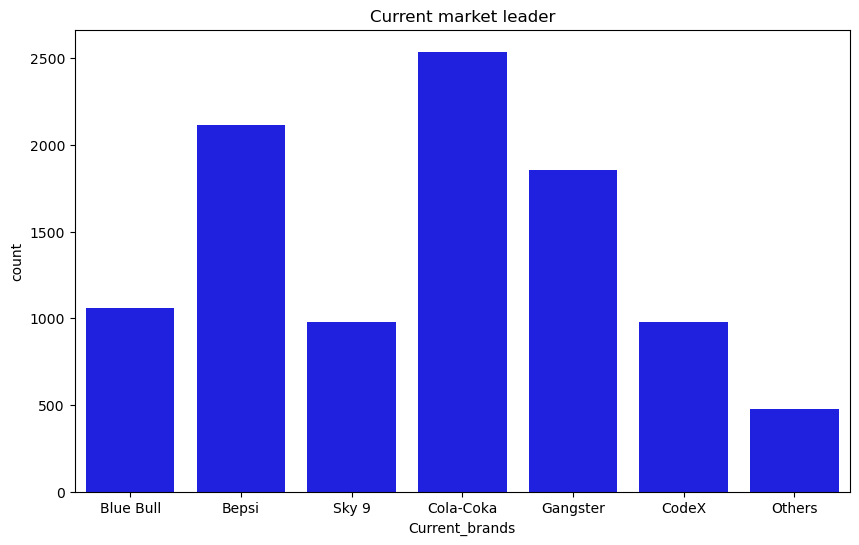

In [16]:
#3a - Who are the current market leaders?
plt.figure(figsize=(10,6))
sns.countplot(x='Current_brands', data= survey,color="blue")
plt.title('Current market leader')
plt.show()


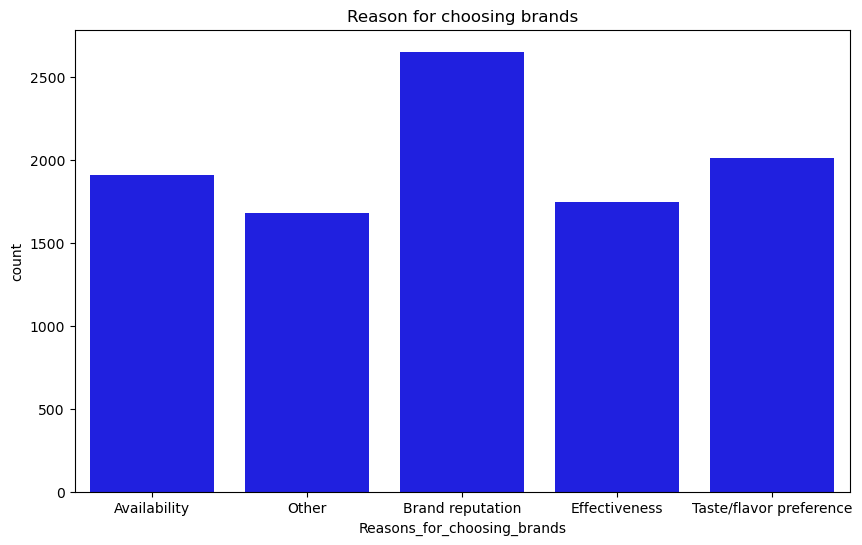

In [17]:
#3b - What are the primary reasons consumers prefer those brands over ours?
plt.figure(figsize=(10,6))
sns.countplot(x='Reasons_for_choosing_brands', data= survey,color="blue")
plt.title('Reason for choosing brands')
plt.show()


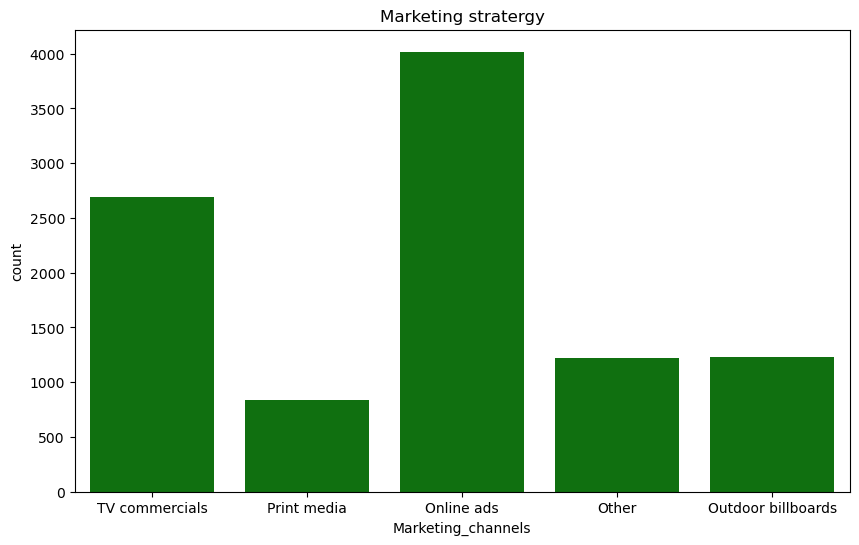

In [18]:
#4a - Which marketing channel can be used to reach more customers?

plt.figure(figsize=(10,6))
sns.countplot(x='Marketing_channels', data= survey,color="green")
plt.title('Marketing stratergy')
plt.show()

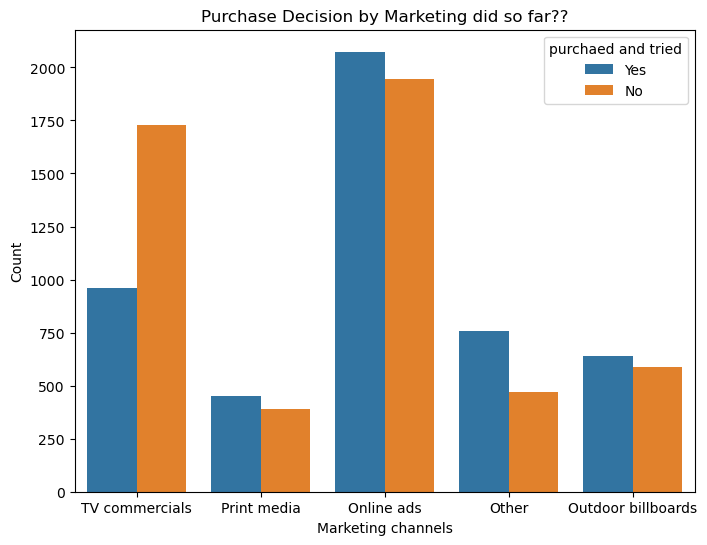

In [19]:
#4b - How effective are different marketing strategies and channels in reaching our customers?

subset_data = survey[['Marketing_channels', 'Packaging_preference', 'Tried_before']]


contingency_table = pd.crosstab(subset_data['Marketing_channels'], subset_data['Packaging_preference'], margins=True)


chi2, p, _, _ = chi2_contingency(contingency_table)

plt.figure(figsize=(8, 6))
sns.countplot(x='Marketing_channels', hue='Tried_before', data=subset_data, hue_order=['Yes', 'No',], dodge=True)
plt.title('Purchase Decision by Marketing did so far??')
plt.xlabel('Marketing channels')
plt.ylabel('Count')
plt.legend(title='purchaed and tried')
plt.show()



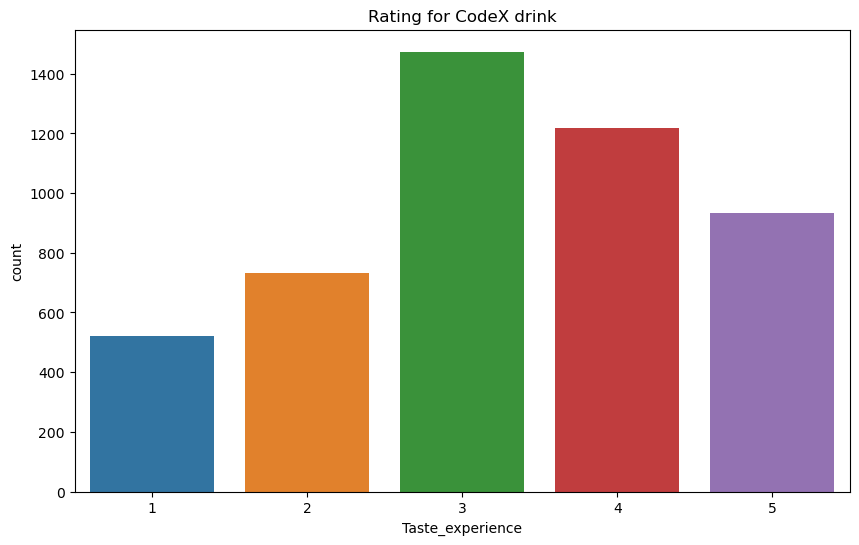

In [21]:
#5a - What do people think about our brand? (overall rating)
taste_yes = survey[survey['Tried_before'].isin(['Yes'])]

plt.figure(figsize=(10,6))
sns.countplot(x='Taste_experience', data= taste_yes)
plt.title('Rating for CodeX drink')
plt.show()

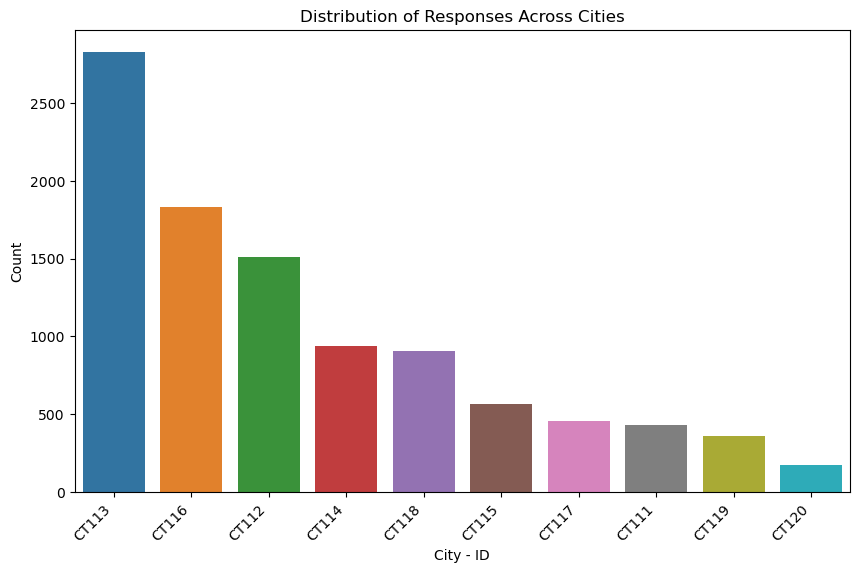

In [22]:
#5b - Which cities do we need to focus more on?

cities = people['City_ID']

plt.figure(figsize=(10, 6))
sns.countplot(x='City_ID', data=people, order=cities.value_counts().index)
plt.title('Distribution of Responses Across Cities')
plt.xlabel('City - ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


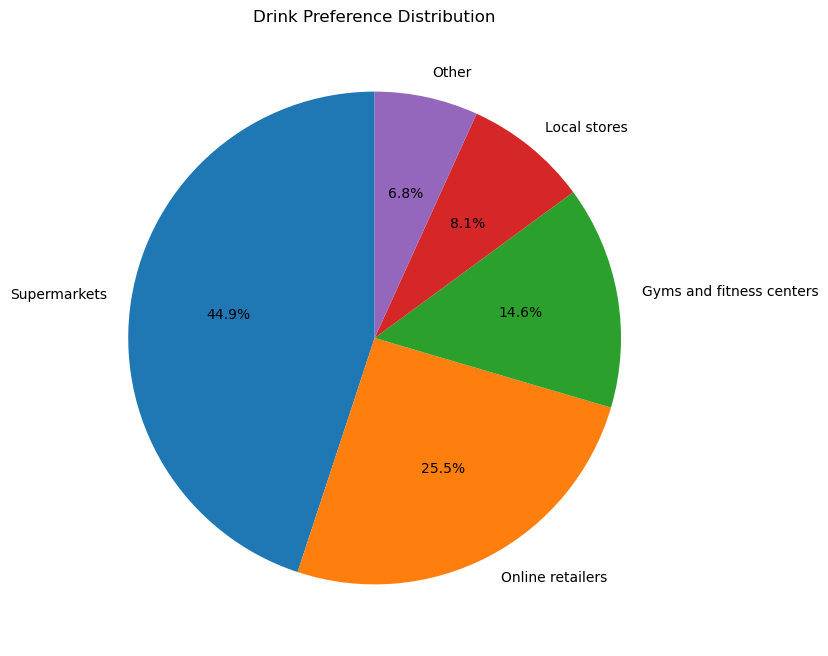

In [23]:
#6a - Where do respondents prefer to purchase energy drinks?

drink_preference_counts = survey['Purchase_location'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(drink_preference_counts, labels=drink_preference_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Drink Preference Distribution')
plt.show()

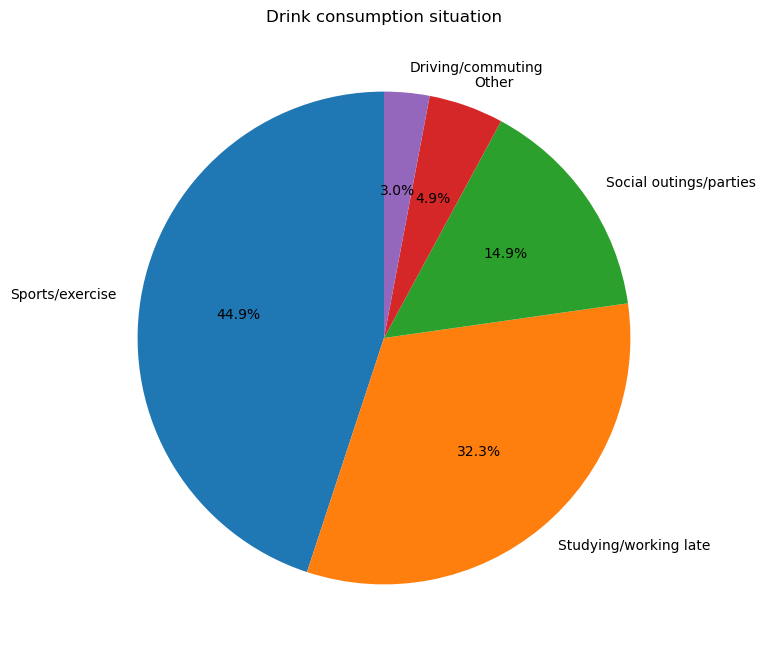

In [24]:
#6b - What are the typical consumption situations for energy drinks among respondents?
consumption_situation = survey['Typical_consumption_situations'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(consumption_situation, labels=consumption_situation.index, autopct='%1.1f%%', startangle=90)
plt.title('Drink consumption situation')
plt.show()

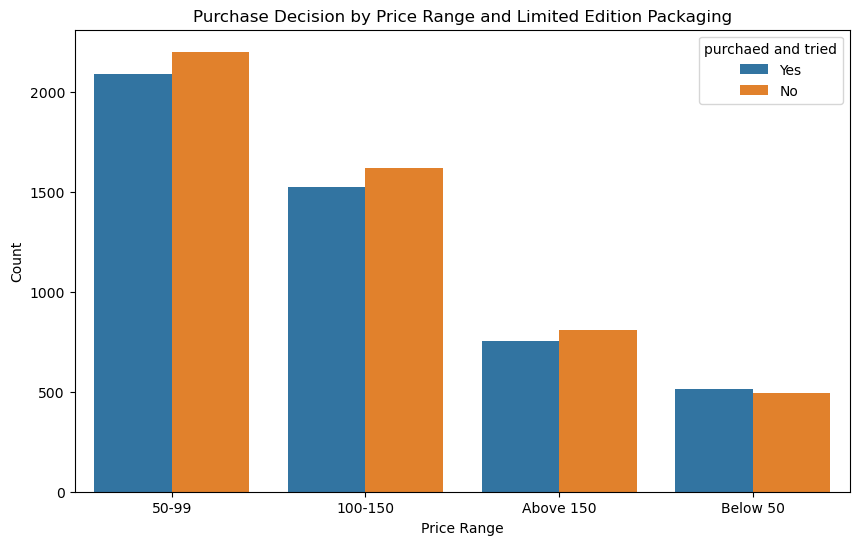

Chi-squared value: 2.519332750047814
P-value: 0.9608233272955939
There is no significant association between Price Range, on Purchase Decision.


In [25]:
#6c - What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

# Step 1: Subset Data
subset_data = survey[['Price_range', 'Limited_edition_packaging', 'Tried_before','Brand_perception']]

# Step 2: Contingency Table
contingency_table = pd.crosstab(subset_data['Price_range'], subset_data['Tried_before'], margins=True)

# Step 3: Chi-squared Test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_range', hue='Tried_before', data=subset_data, hue_order=['Yes', 'No',], dodge=True)
plt.title('Purchase Decision by Price Range and Limited Edition Packaging')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='purchaed and tried')
plt.show()

# Step 5: Interpretation
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant association between Price Range on Purchase Decision.")
else:
    print("There is no significant association between Price Range, on Purchase Decision.")


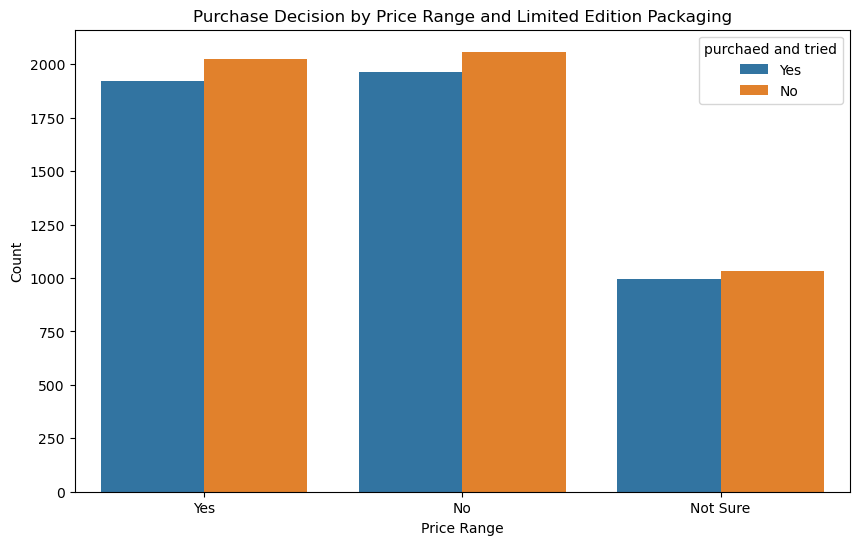

In [26]:
#6c - What factors influence respondents' purchase decisions, such as price range and limited edition packaging?


contingency_table = pd.crosstab(subset_data['Limited_edition_packaging'], subset_data['Tried_before'], margins=True)

chi2, p, _, _ = chi2_contingency(contingency_table)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Limited_edition_packaging', hue='Tried_before', data=subset_data, hue_order=['Yes', 'No',], dodge=True)
plt.title('Purchase Decision by Price Range and Limited Edition Packaging')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='purchaed and tried')
plt.show()



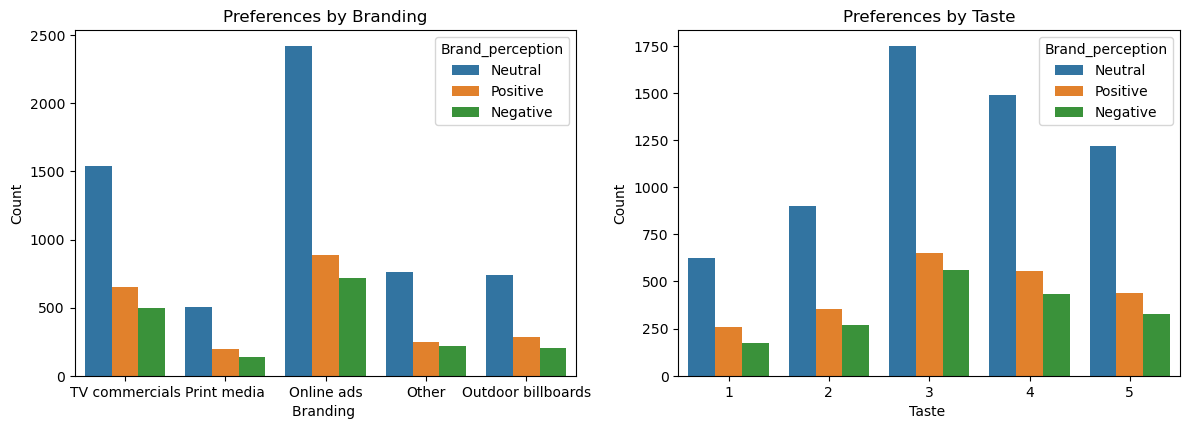

In [27]:
#7 - Which area of business should we focus more on our product development? (Branding/taste)

subset_data = survey[['Marketing_channels', 'Taste_experience', 'Brand_perception']]

contingency_table = pd.crosstab(subset_data['Marketing_channels'], [subset_data['Taste_experience'], subset_data['Brand_perception']], margins=True)

chi2, p, _, _ = chi2_contingency(contingency_table)

plt.figure(figsize=(12, 8))

# Count plot for Branding
plt.subplot(2, 2, 1)
sns.countplot(x='Marketing_channels', hue='Brand_perception', data=subset_data)
plt.title('Preferences by Branding')
plt.xlabel('Branding ')
plt.ylabel('Count')

# Count plot for Taste
plt.subplot(2, 2, 2)
sns.countplot(x='Taste_experience', hue='Brand_perception', data=subset_data)
plt.title('Preferences by Taste')
plt.xlabel('Taste ')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



## Some more insights about data

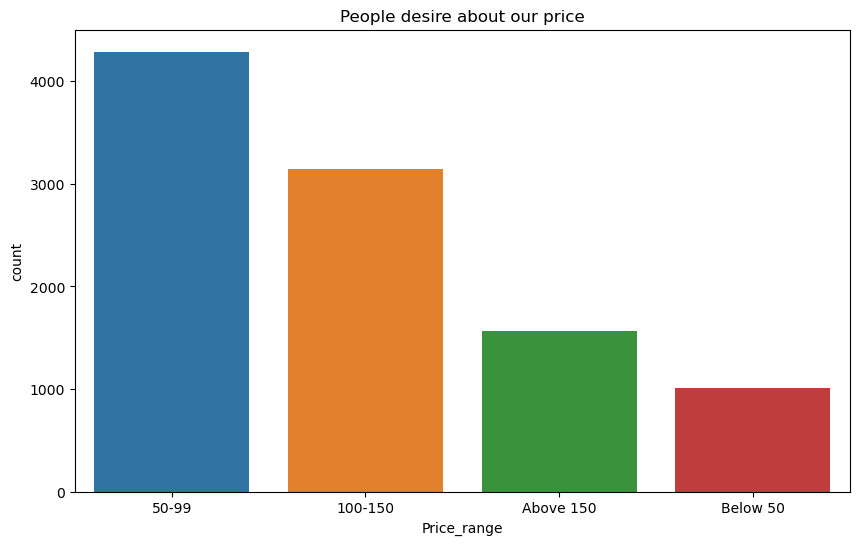

In [28]:
# Peoples desire about our price
plt.figure(figsize=(10,6))
sns.countplot(x='Price_range', data= survey)
plt.title('People desire about our price')
plt.show()

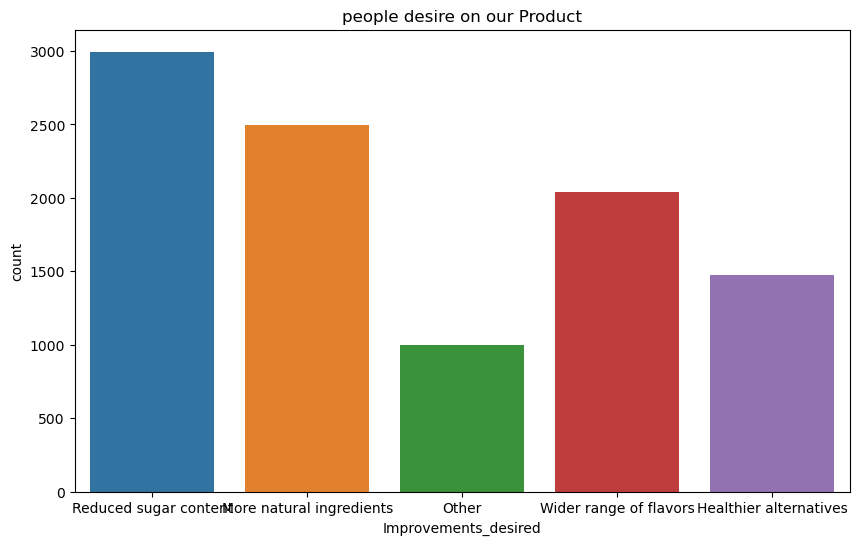

In [29]:
# Improvement needed in our product
plt.figure(figsize=(10,6))
sns.countplot(x='Improvements_desired', data= survey)
plt.title('people desire on our Product')
plt.show()

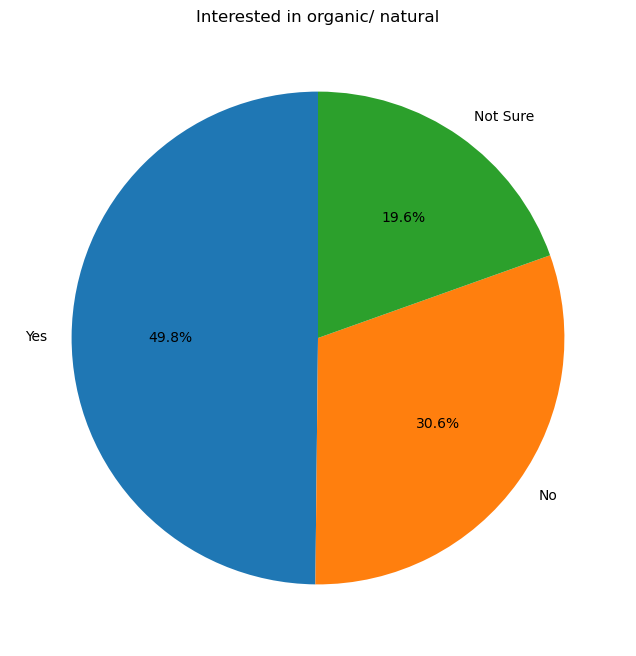

In [33]:
# people intgerested in organic

intrerested_in_organic = survey['Interest_in_natural_or_organic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(intrerested_in_organic, labels=intrerested_in_organic.index, autopct='%1.1f%%', startangle=90)
plt.title('Interested in organic/ natural')
plt.show()

## Prediction for health concerns about our drink

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Merge data
merged_data = pd.merge(survey, people, on="Respondent_ID", how="inner")

# Select relevant features and target variable
features = ["Age", "Gender", "Consume_frequency", "Consume_time", "Consume_reason", "Heard_before",
            "Tried_before", "Ingredients_expected", "Interest_in_natural_or_organic"]
target = "Health_concerns"

# Drop rows with missing values
merged_data = merged_data.dropna(subset=features + [target])

# Encode categorical variables
le = LabelEncoder()
for feature in ["Age", "Gender", "Consume_frequency", "Consume_time", "Consume_reason", "Heard_before",
                "Tried_before", "Ingredients_expected", "Interest_in_natural_or_organic"]:
    merged_data[feature] = le.fit_transform(merged_data[feature])

# Convert the target variable to numeric
merged_data[target] = le.fit_transform(merged_data[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_data[features], merged_data[target], test_size=0.30, random_state=42)

# Initialize the model
clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.542

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.28      0.33      1195
           1       0.60      0.72      0.65      1805

    accuracy                           0.54      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.52      0.54      0.52      3000

